In [1]:
import pandas as pd
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from numpy import asarray
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_1 = pd.read_csv('../Data/cvd_p.csv', header = None, names = ['$\theta$', '$\Phi$', '$b$', '$v_{trans}$', '$v_{rot}$'])
data_2 = pd.read_csv('../Data/cvd_t.csv', header = None, names = ['C', 'S', 'D'])

data_1

,$\theta$,$\Phi$,$b$,$v_{trans}$,$v_{rot}$
0,0.144,0.733,3.240,0.00558,0.00575
1,0.386,6.040,2.600,0.00344,0.00575
2,0.370,0.497,1.220,0.01150,0.00857
3,0.246,4.730,1.230,0.00595,0.00435
4,0.271,2.490,1.880,0.00875,0.00605
...,...,...,...,...,...
1995,0.306,3.510,1.300,0.00330,0.00125
1996,0.251,0.669,3.210,0.00686,0.00597
1997,0.265,1.130,2.350,0.01190,0.00471
1998,0.233,1.190,3.130,0.00458,0.00555


In [3]:
data_2

,C,S,D
0,0.00,0.76,0.24
1,0.04,0.58,0.38
2,0.74,0.22,0.04
3,0.62,0.24,0.14
4,0.28,0.54,0.16
...,...,...,...
1995,0.58,0.16,0.26
1996,0.00,0.82,0.18
1997,0.22,0.60,0.10
1998,0.00,0.70,0.30


In [4]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(data_1, data_2, train_size = .85)

In [5]:
x_train

,$\theta$,$\Phi$,$b$,$v_{trans}$,$v_{rot}$
968,0.392,4.500,2.610,0.00512,0.00372
1912,0.318,4.770,2.670,0.00486,0.00870
1663,0.371,4.830,0.459,0.01150,0.00684
1478,0.174,5.250,3.120,0.00565,0.00584
669,0.201,0.138,3.450,0.00729,0.00669
...,...,...,...,...,...
420,0.356,5.210,1.180,0.00711,0.00202
906,0.260,4.450,3.110,0.00747,0.01060
1670,0.372,4.970,1.170,0.00834,0.00493
952,0.360,2.190,3.120,0.01170,0.01240


In [6]:
# Define the model.
model = keras.models.Sequential([
    keras.layers.Dense(10, input_dim=5, activation='sigmoid', kernel_initializer='RandomUniform', bias_initializer='RandomUniform'),
    keras.layers.Dense(3, activation='softmax', kernel_initializer='RandomUniform')
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(
    x_train,
    y_train,
    epochs=100, batch_size=50, validation_split = .17, validation_batch_size = 25)

Epoch 1/100
29/29 [==============================] - 1s 10ms/step - loss: 0.0772 - accuracy: 0.6067 - val_loss: 0.0684 - val_accuracy: 0.8028
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0613 - accuracy: 0.7590 - val_loss: 0.0543 - val_accuracy: 0.8028
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0523 - accuracy: 0.7590 - val_loss: 0.0479 - val_accuracy: 0.8028
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0499 - accuracy: 0.7590 - val_loss: 0.0465 - val_accuracy: 0.8028
Epoch 5/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0494 - accuracy: 0.7590 - val_loss: 0.0460 - val_accuracy: 0.8028
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.7590 - val_loss: 0.0456 - val_accuracy: 0.8028
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0487 - accuracy: 0.7590 - val_loss: 0.0454 - val_accuracy: 0.8028
Epoch 8/100


Epoch 59/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0220 - accuracy: 0.8738 - val_loss: 0.0203 - val_accuracy: 0.8927
Epoch 60/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.8802 - val_loss: 0.0198 - val_accuracy: 0.8962
Epoch 61/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0210 - accuracy: 0.8845 - val_loss: 0.0194 - val_accuracy: 0.8997
Epoch 62/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.8880 - val_loss: 0.0190 - val_accuracy: 0.8997
Epoch 63/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.8909 - val_loss: 0.0186 - val_accuracy: 0.9100
Epoch 64/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.8923 - val_loss: 0.0182 - val_accuracy: 0.9066
Epoch 65/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.8965 - val_loss: 0.0177 - val_accuracy: 0.9100
Epoch 

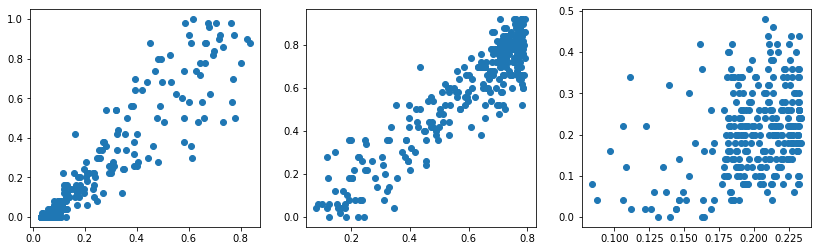

In [9]:
# make predictions for the input data
yhat = model.predict(x_test)

plt.figure(figsize=(14, 4))
for i, prob in enumerate(y_test.keys()):
    plt.subplot(1, 3, i+1)
    plt.scatter(yhat[:, i], y_test[prob].values)

In [ ]:
num_iterations = 10

for iteration in range(num_iterations):
#     train network using different structures and/or random train test splits